In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [7]:
# Shuffle the datasets
import random
brainT
np.random.shuffle(brainT)
print(brainT)

[[ 1.0  1.6  171.8 ...  8.9  0.9  0.0]
 [ 1.0  8.4  1043.9 ...  5.3  1.0  0.0]
 [ 0.0  11.7  602.2 ...  3.4  1.0  0.0]
 ...
 [ 1.0  8.8  660.2 ...  3.9  1.0  0.0]
 [ 1.0  19.9  1237.7 ...  5.1  1.0  0.0]
 [ 0.0  15.7  809.8 ...  4.0  1.0  0.0]]


In [8]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [9]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
#build model for Training
model = Sequential()
model.add(Dense(2, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 2s 11ms/step - loss: 77.3976 - accuracy: 0.4400 - val_loss: 48.5605 - val_accuracy: 0.4326
Epoch 2/500
83/83 [==============================] - 0s 6ms/step - loss: 24.1944 - accuracy: 0.4347 - val_loss: 7.9691 - val_accuracy: 0.4362
Epoch 3/500
83/83 [==============================] - 0s 5ms/step - loss: 3.3220 - accuracy: 0.4484 - val_loss: 0.6828 - val_accuracy: 0.5275
Epoch 4/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6730 - accuracy: 0.5687 - val_loss: 0.6907 - val_accuracy: 0.5115
Epoch 5/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6702 - accuracy: 0.5850 - val_loss: 0.6765 - val_accuracy: 0.5576
Epoch 6/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6699 - accuracy: 0.6002 - val_loss: 0.6838 - val_accuracy: 0.5319
Epoch 7/500
83/83 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.5995 - val_loss: 0.6633 - val_accuracy: 0.6294
Epoch 8/5

Epoch 59/500
83/83 [==============================] - 0s 6ms/step - loss: 0.3584 - accuracy: 0.8827 - val_loss: 0.3403 - val_accuracy: 0.8945
Epoch 60/500
83/83 [==============================] - 0s 6ms/step - loss: 0.3591 - accuracy: 0.8869 - val_loss: 0.3387 - val_accuracy: 0.8945
Epoch 61/500
83/83 [==============================] - 0s 6ms/step - loss: 0.3555 - accuracy: 0.8850 - val_loss: 0.3483 - val_accuracy: 0.8954
Epoch 62/500
83/83 [==============================] - 1s 6ms/step - loss: 0.3553 - accuracy: 0.8872 - val_loss: 0.3383 - val_accuracy: 0.8963
Epoch 63/500
83/83 [==============================] - 1s 7ms/step - loss: 0.3546 - accuracy: 0.8857 - val_loss: 0.3360 - val_accuracy: 0.8972
Epoch 64/500
83/83 [==============================] - 1s 8ms/step - loss: 0.3521 - accuracy: 0.8872 - val_loss: 0.3367 - val_accuracy: 0.8972
Epoch 65/500
83/83 [==============================] - 1s 7ms/step - loss: 0.3532 - accuracy: 0.8884 - val_loss: 0.3371 - val_accuracy: 0.8936
Epoch 

83/83 [==============================] - 0s 5ms/step - loss: 0.1756 - accuracy: 0.9366 - val_loss: 0.1839 - val_accuracy: 0.9406
Epoch 174/500
83/83 [==============================] - 0s 5ms/step - loss: 0.1742 - accuracy: 0.9404 - val_loss: 0.1802 - val_accuracy: 0.9362
Epoch 175/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1738 - accuracy: 0.9381 - val_loss: 0.1856 - val_accuracy: 0.9362
Epoch 176/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1723 - accuracy: 0.9408 - val_loss: 0.1820 - val_accuracy: 0.9371
Epoch 177/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1702 - accuracy: 0.9412 - val_loss: 0.1861 - val_accuracy: 0.9406
Epoch 178/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1691 - accuracy: 0.9404 - val_loss: 0.1812 - val_accuracy: 0.9371
Epoch 179/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1662 - accuracy: 0.9457 - val_loss: 0.2061 - val_accuracy: 0.9273
Epoch 180/500

83/83 [==============================] - 1s 7ms/step - loss: 0.1102 - accuracy: 0.9620 - val_loss: 0.1359 - val_accuracy: 0.9539
Epoch 288/500
83/83 [==============================] - 1s 7ms/step - loss: 0.1122 - accuracy: 0.9651 - val_loss: 0.1141 - val_accuracy: 0.9583
Epoch 289/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1115 - accuracy: 0.9601 - val_loss: 0.1213 - val_accuracy: 0.9574
Epoch 290/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1142 - accuracy: 0.9636 - val_loss: 0.1619 - val_accuracy: 0.9433
Epoch 291/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1119 - accuracy: 0.9628 - val_loss: 0.1526 - val_accuracy: 0.9459
Epoch 292/500
83/83 [==============================] - 1s 6ms/step - loss: 0.1104 - accuracy: 0.9674 - val_loss: 0.1278 - val_accuracy: 0.9574
Epoch 293/500
83/83 [==============================] - 1s 8ms/step - loss: 0.1106 - accuracy: 0.9658 - val_loss: 0.1137 - val_accuracy: 0.9628
Epoch 294/500

83/83 [==============================] - 0s 6ms/step - loss: 0.0870 - accuracy: 0.9719 - val_loss: 0.0988 - val_accuracy: 0.9628
Epoch 402/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0920 - accuracy: 0.9708 - val_loss: 0.0938 - val_accuracy: 0.9672
Epoch 403/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0882 - accuracy: 0.9723 - val_loss: 0.1947 - val_accuracy: 0.9379
Epoch 404/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0893 - accuracy: 0.9708 - val_loss: 0.0887 - val_accuracy: 0.9734
Epoch 405/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0919 - accuracy: 0.9704 - val_loss: 0.1104 - val_accuracy: 0.9610
Epoch 406/500
83/83 [==============================] - 1s 6ms/step - loss: 0.0847 - accuracy: 0.9753 - val_loss: 0.1034 - val_accuracy: 0.9690
Epoch 407/500
83/83 [==============================] - 0s 6ms/step - loss: 0.0885 - accuracy: 0.9723 - val_loss: 0.1434 - val_accuracy: 0.9521
Epoch 408/500

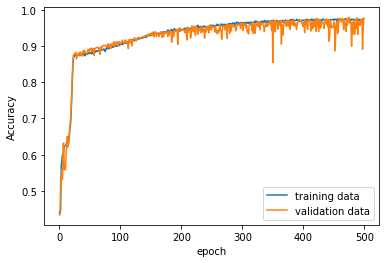

In [11]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N3check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [12]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 4ms/step - loss: 0.0645 - accuracy: 0.9814


In [13]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 4ms/step - loss: 0.0753 - accuracy: 0.9778


In [14]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 0.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]
 [ 1.0]]
83/83 [==============================] - 0s 3ms/step
[[ 0.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]
 [ 1.0]]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9879414298018949
0.9703891708967851
0.979086641058472


In [16]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]]
36/36 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]
 [ 0.0]]


In [17]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9817813765182186
0.9680638722554891
0.9748743718592965
